# Getting started

Ontology based atomic structure creation, manipulation, querying.

Imports

In [1]:
from atomrdf import KnowledgeGraph
import atomrdf.build as build

The initial step is to create a Knowledge Graph

In [2]:
kg = KnowledgeGraph(enable_log=True)

## Creation of structures

We will create three structures for the demonstration.

First a BCC Iron structure

In [3]:
struct_Fe = build.bulk("Fe", graph=kg)

Note that we passed an argument `graph=kg` which ensures that when the structure is created, it is also added to the Graph automatically. We can visualise the graph.

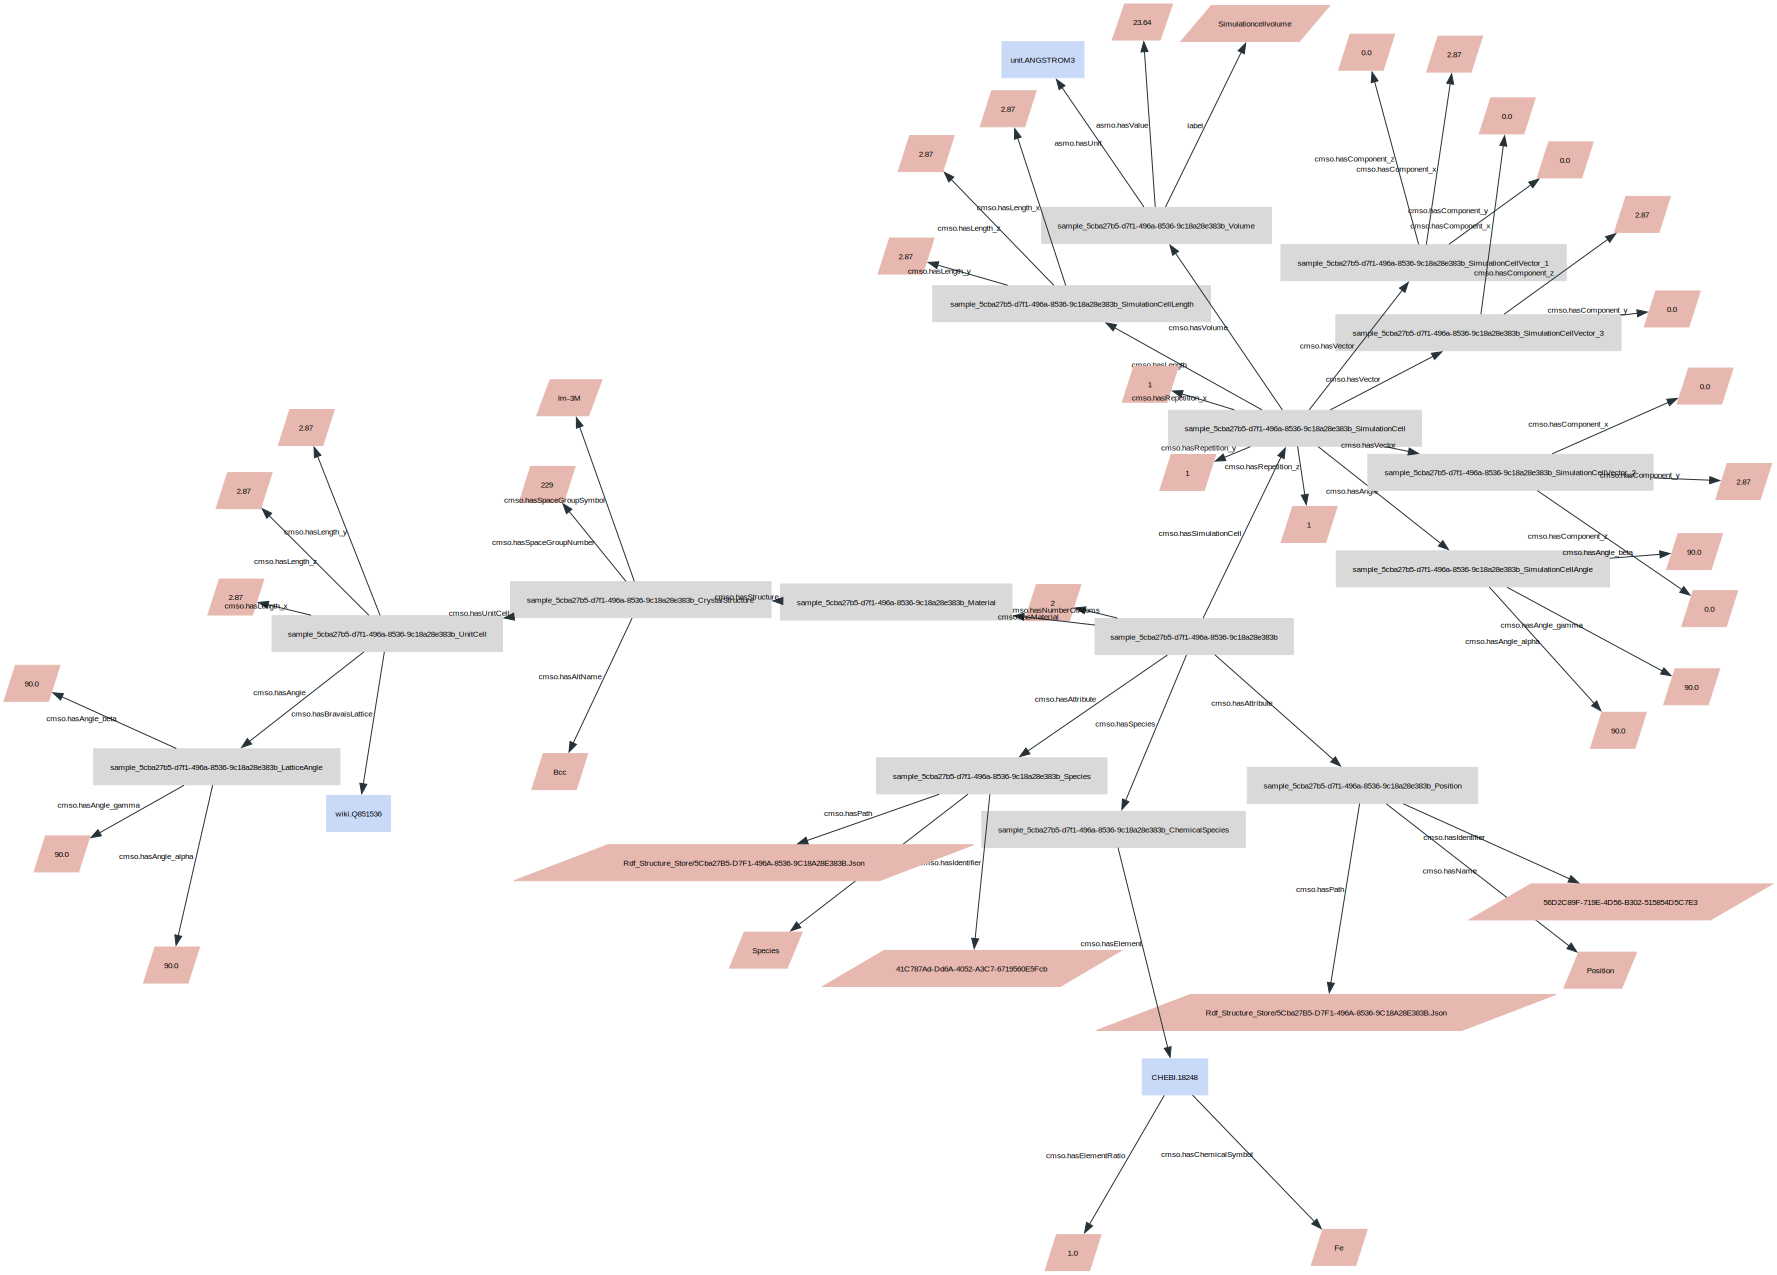

In [4]:
kg.visualise(hide_types=True)

Now a Si diamond structure

In [17]:
struct_Si = build.bulk("Si", graph=kg)

Finally, an L12 $Ni_3 Al$ structure

In [18]:
struct_l12 = build.bulk(['Al', 'Ni'], structure="l12", 
                         lattice_constant=3.57, graph=kg)

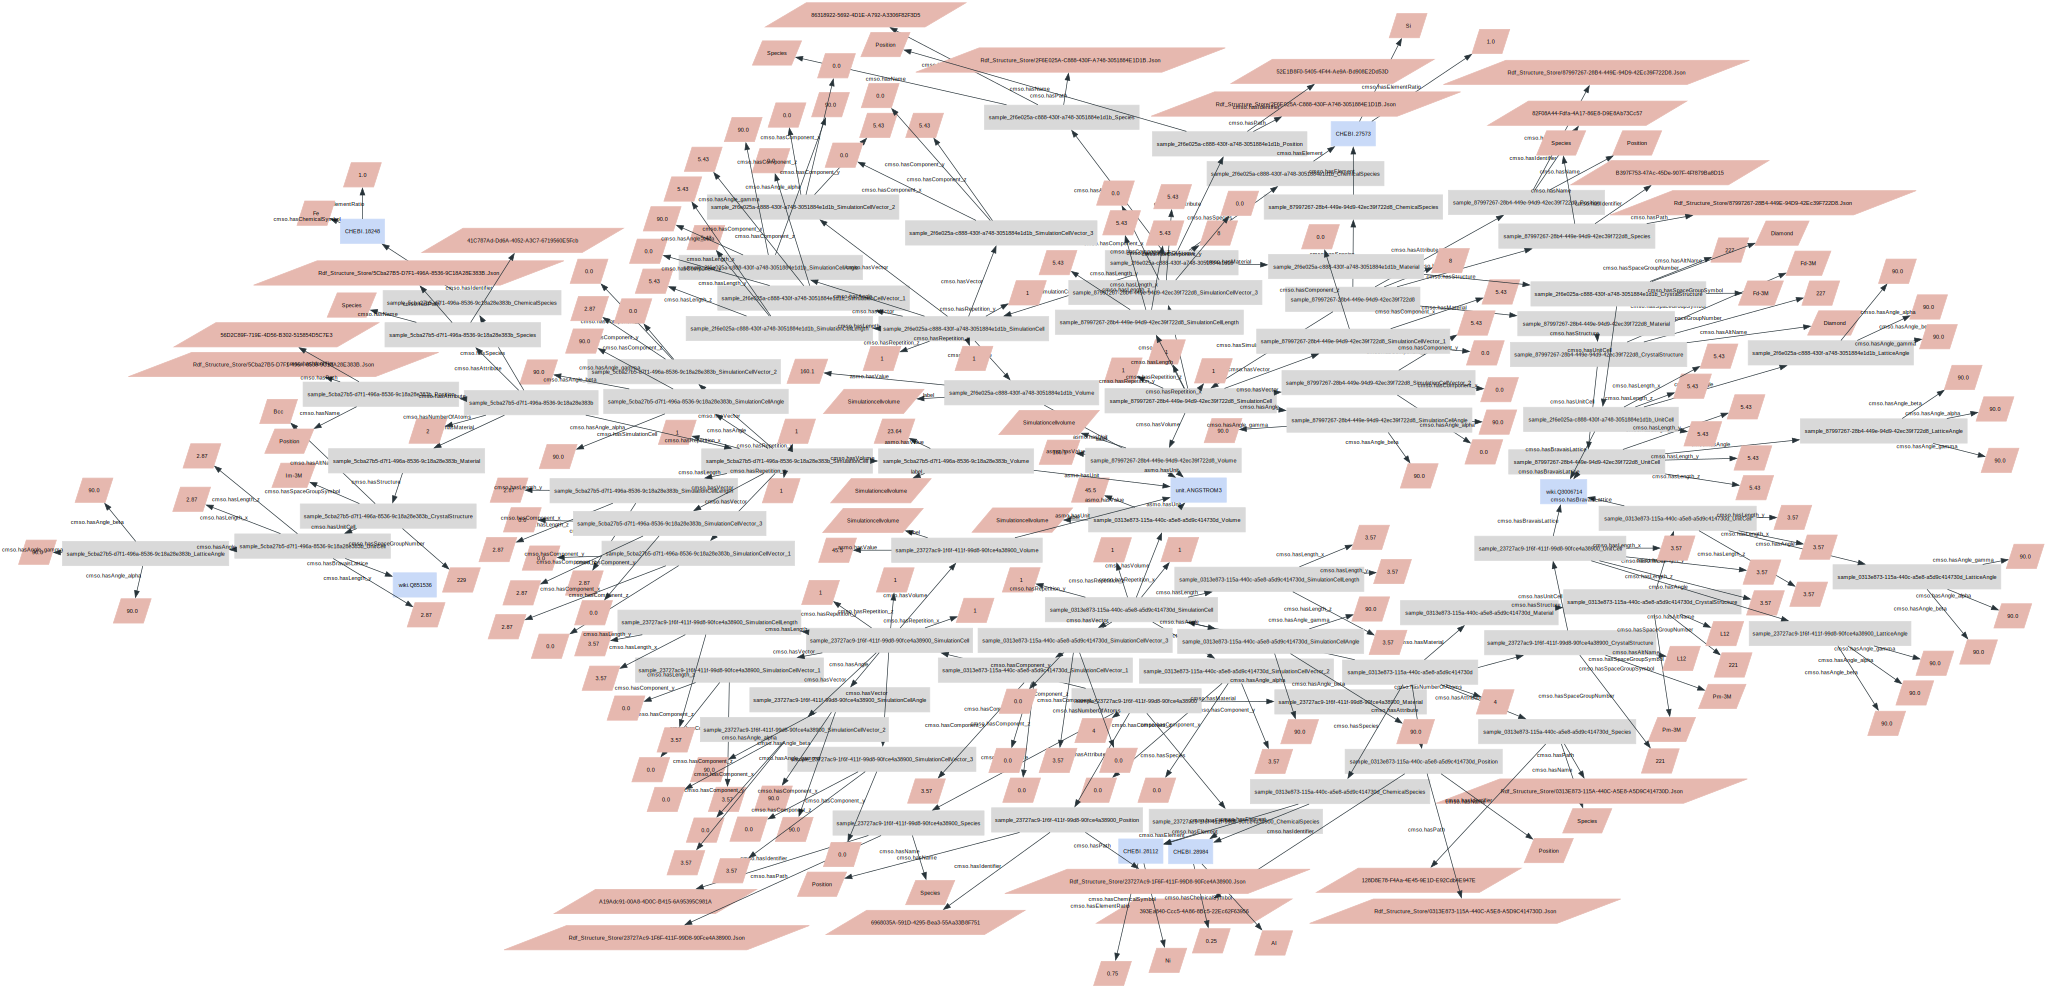

In [19]:
kg.visualise(hide_types=True, size=(60,30))

We can save the graph and reload it as needed

In [20]:
kg.write('serial.ttl', format='ttl')

In [21]:
kg = KnowledgeGraph(graph_file='serial.ttl')

In [22]:
kg.n_samples

5

## Querying the graph

An example question would be, **what are the space group of all structures with 4 atoms?**


The corresponding SPARQL query looks like this:

In [23]:
query = """
PREFIX cmso: <http://purls.helmholtz-metadaten.de/cmso/>
SELECT DISTINCT ?symbol
WHERE {
    ?sample cmso:hasNumberOfAtoms ?number .
    ?sample cmso:hasMaterial ?material .
    ?material cmso:hasStructure ?structure .
    ?structure cmso:hasSpaceGroupSymbol ?symbol .
FILTER (?number="4"^^xsd:integer)
}"""

In [24]:
res = kg.query(query)

And print the results

In [25]:
res

,symbol
0,Pm-3m


The query system can also be used without experience in SPARQL, or deep knowledge about the ontology terms. The same query would be:

In [36]:
df = kg.query_sample([kg.terms.cmso.hasSpaceGroupSymbol, kg.terms.cmso.hasNumberOfAtoms==4])
df

,AtomicScaleSample,hasSpaceGroupSymbolvalue,hasNumberOfAtomsvalue
0,sample:0313e873-115a-440c-a5e8-a5d9c414730d,Pm-3m,4
1,sample:23727ac9-1f6f-411f-99d8-90fce4a38900,Pm-3m,4


In [37]:
sample = df.AtomicScaleSample.values[0]

We can write this sample to a file, for example, a LAMMPS data format, to use it for further simulations

In [40]:
kg.to_file(sample, 'lammps.data', format="lammps-data")

In [41]:
! more lammps.data

(written by ASE)

4 atoms
2 atom types

0.0      3.5699999999999998  xlo xhi
0.0      3.5699999999999998  ylo yhi
0.0      3.5699999999999998  zlo zhi

Atoms # atomic

     1   1                       0                       0                       0
     2   2      1.7849999999999999                       0      1.7849999999999999
     3   2                       0      1.7849999999999999      1.7849999999999999
     4   2      1.7849999999999999      1.7849999999999999                       0
lammps.data (END)